In [101]:
import pandas as pd 
import sklearn
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
"""Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). 
Be sure to review the readings before you start on this assignment. 
Calculate the sum of least square error for each different values of 'k'. 
Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points). 
Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). 
Comment your code as needed."""

"Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). \nBe sure to review the readings before you start on this assignment. \nCalculate the sum of least square error for each different values of 'k'. \nUsing Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points). \nFinally plot the optimal clusters with their centroids along with a brief explanation (50 points). \nComment your code as needed."

In [7]:
# Load the dataset
Diabetes = pd.read_csv("/Users/sunho/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv")

# Diabetes.head()
Diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [113]:
# categorical values to numeric values

Diabetes['A1Cresult'].value_counts()
conditions = [
    Diabetes['A1Cresult'] == '>8',
    Diabetes['A1Cresult'] == 'Norm', 
    pd.isna(Diabetes['A1Cresult']),
    Diabetes['A1Cresult'] == '>7'
]
choices = [8.5, 6,6,7.5]
Diabetes['A1Cresult_numeric'] = np.select(conditions, choices, default='Unknown')
print(Diabetes['A1Cresult_numeric'].value_counts())
print(Diabetes['A1Cresult'].value_counts())

A1Cresult_numeric
6      89738
8.5     8216
7.5     3812
Name: count, dtype: int64
A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64


In [167]:
# categorical values to numeric values
Diabetes['max_glu_serum'].value_counts()

conditions = [
    Diabetes['max_glu_serum'] == 'Norm',
    Diabetes['max_glu_serum'] == '>200', 
    pd.isna(Diabetes['max_glu_serum']),
    Diabetes['max_glu_serum'] == '>300'
]
choices = [100, 250, 100, 350]

Diabetes['max_glu_serum_numeric'] = np.select(conditions, choices, default='Unknown')

print(Diabetes['max_glu_serum_numeric'].value_counts())
print(Diabetes['max_glu_serum'].value_counts())

max_glu_serum_numeric
100    99017
250     1485
350     1264
Name: count, dtype: int64
max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64


In [127]:
X = Diabetes[['num_medications', 'number_diagnoses']].values  # Convert to a NumPy array for clustering 

In [129]:
# Implement k-means clustering and calculate Sum of Squared Errors (SSE)
sse = []  # List to store the sum of squared errors for each k
k_values = range(1, 11)  # Testing k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize k-means with k clusters
    kmeans.fit(X)  # Fit the model to the data
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the nearest cluster center

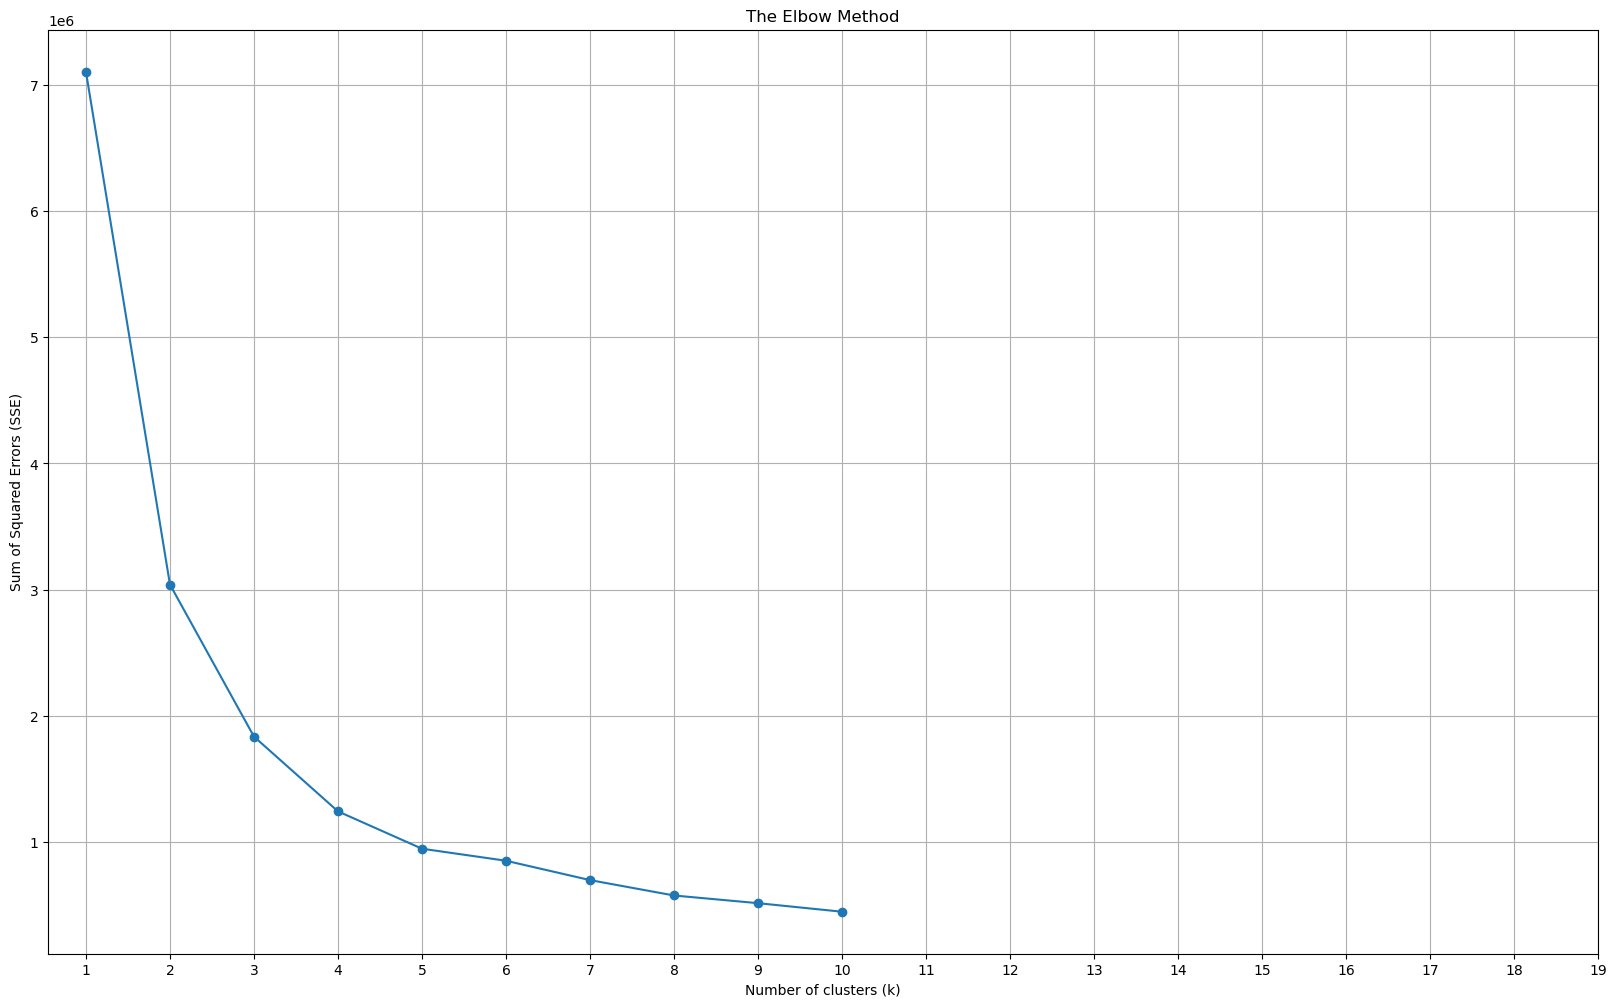

In [143]:
# Step 4: Determine the optimal number of clusters using the elbow method
plt.figure(figsize=(20, 12))
plt.plot(k_values, sse, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(np.arange(1, 20, 1))  # From 1 to 10 with 0.5 intervals
plt.grid(True)
plt.show()

In [145]:
# Perform k-means clustering with the optimal number of clusters
optimal_k = 10 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)  # Fit the model to the data

KMeans(n_clusters=10, random_state=42)

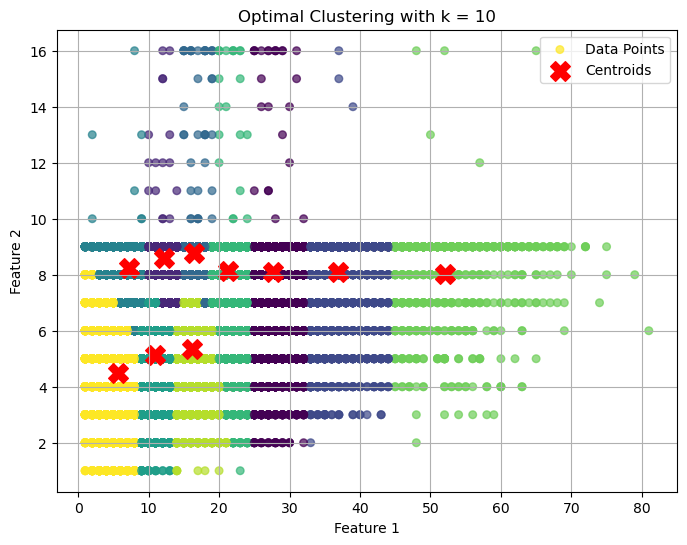

In [147]:
# Plot the optimal clusters with their centroids
plt.figure(figsize=(8, 6))
# Scatter plot of data points with their assigned cluster colors
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=30, alpha=0.7, label="Data Points")
# Mark centroids with red 'X'
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label="Centroids")
plt.title(f"Optimal Clustering with k = {optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

#integer variable was the only numeric variable available